In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
bank_data = pd.read_csv(r"Churn_Modelling.csv")


In [4]:
bank_data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
bank_data.shape

(10000, 14)

In [8]:
bank_data.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

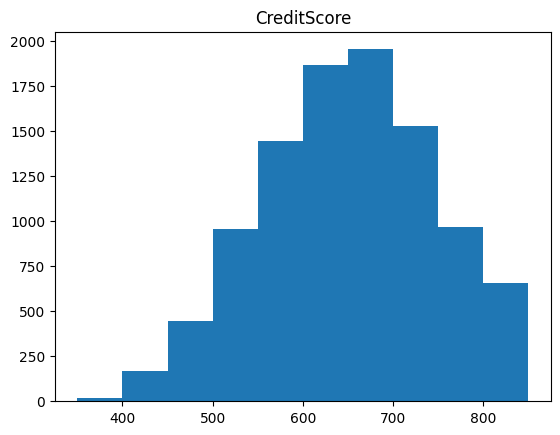

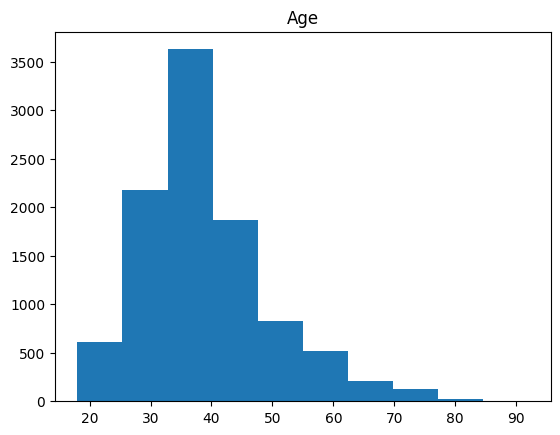

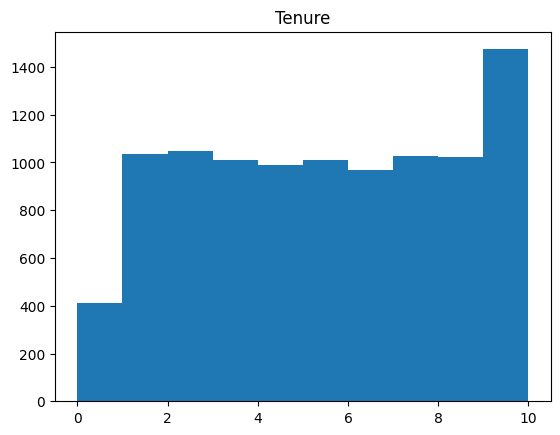

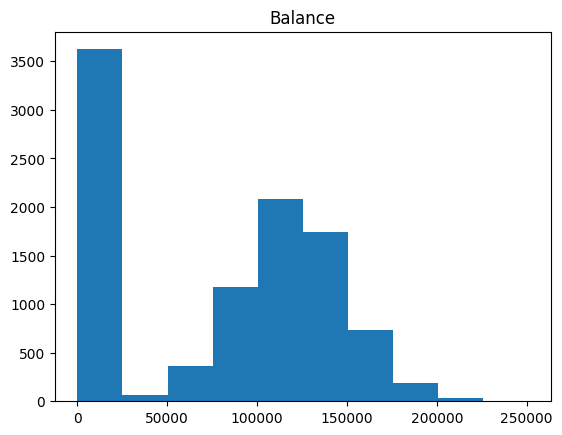

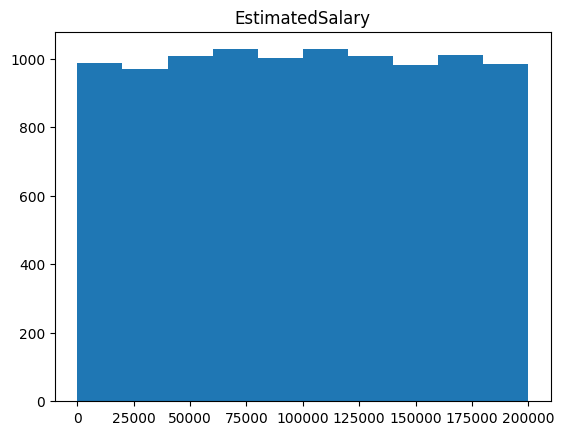

In [9]:
import matplotlib.pyplot as plt
num_cal_dis = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for i in num_cal_dis:
 plt.hist(bank_data[i])
 plt.title(i)
 plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Create a mask to identify categorical features (with dtype 'object')
categorical_feature_mask = bank_data.dtypes == object

# Get the names of the categorical columns
categorical_cols = bank_data.columns[categorical_feature_mask].tolist()

# Apply LabelEncoder to each categorical column
bank_data[categorical_cols] = bank_data[categorical_cols].apply(lambda col: le.fit_transform(col))

# Check the data info
bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int32  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int32  
 5   Gender           10000 non-null  int32  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(3), int64(9)
memory usage: 976.7 KB


In [11]:
from scipy.stats import zscore
df_scaled = bank_data.apply(zscore)
x_col = df_scaled.columns.tolist()[1:10]
y_col = bank_data.columns.tolist()[-1:]
x = df_scaled[x_col].values
y = np.array(bank_data['Exited'])
x,y

(array([[-0.78321342, -0.46418322, -0.32622142, ..., -1.04175968,
         -1.22584767, -0.91158349],
        [-0.60653412, -0.3909112 , -0.44003595, ..., -1.38753759,
          0.11735002, -0.91158349],
        [-0.99588476,  0.62898807, -1.53679418, ...,  1.03290776,
          1.33305335,  2.52705662],
        ...,
        [-1.47928179,  0.07353887,  0.60498839, ...,  0.68712986,
         -1.22584767, -0.91158349],
        [-0.11935577,  0.98943914,  1.25683526, ..., -0.69598177,
         -0.02260751,  0.80773656],
        [-0.87055909,  1.4692527 ,  1.46377078, ..., -0.35020386,
          0.85996499, -0.91158349]]),
 array([1, 0, 1, ..., 1, 1, 0], dtype=int64))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape, y_train.shape

((8000, 9), (8000,))

In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\aryan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
from tensorflow.keras.utils import to_categorical
#one hot encoding
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)


In [15]:
#normalize data
from sklearn.preprocessing import Normalizer
normalize = Normalizer(norm = "max")
x_train = normalize.transform(x_train)
x_train

array([[-0.69983625,  1.        ,  0.20589342, ...,  0.87174483,
        -0.18804662,  0.51073293],
       [-0.55614847, -0.53587412,  0.79933419, ..., -0.67130638,
         0.31430178, -0.35305276],
       [ 0.56795638,  0.07661964,  0.49492403, ...,  0.2253048 ,
        -0.80910439,  0.53313574],
       ...,
       [ 0.92295784, -0.84083298,  0.39151286, ..., -0.95052148,
        -0.10925757,  0.73699431],
       [ 0.62810657, -0.60329209, -0.50245325, ..., -0.56775551,
        -1.        ,  0.65892083],
       [ 0.48268598,  0.36835303, -0.02409906, ..., -0.68759957,
        -0.80910439,  0.53313574]])

In [16]:
x_test = normalize.transform(x_test)
x_test


array([[ 0.44594093, -1.        ,  0.27774468, ..., -0.22134368,
         0.54879339, -0.57615938],
       [-1.        , -0.82427747, -0.97347258, ...,  0.92303594,
         0.28798714, -0.61030904],
       [ 1.        , -0.15376262,  0.15062343, ..., -0.00274511,
        -0.76030652, -0.5653907 ],
       ...,
       [ 0.21740507, -0.91083141,  0.77206329, ...,  0.27846196,
        -1.        ,  0.65892083],
       [-0.26817501, -0.42166338,  0.56358431, ...,  0.72577104,
        -0.64531369, -0.47987798],
       [-1.        , -0.92420675, -0.64533974, ..., -0.62433331,
         0.40085905, -0.81773973]])

In [17]:
import tensorflow as tf
model = tf.keras.Sequential()


In [18]:
from tensorflow.keras.layers import Dense
model.add(Dense(units = 6, activation = 'relu', input_shape = (9, )))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))


C:\Users\aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242 (968.00 B)

 Trainable params: 242 (968.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    x_train, y_train, 
    batch_size=45, 
    epochs=200, 
    validation_data=(x_train, y_train)  # Use your validation dataset here
)


Epoch 1/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7684 - loss: 0.6114 - val_accuracy: 0.7925 - val_loss: 0.4703
Epoch 2/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7997 - loss: 0.4551 - val_accuracy: 0.7925 - val_loss: 0.4464
Epoch 3/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7863 - loss: 0.4551 - val_accuracy: 0.7928 - val_loss: 0.4363
Epoch 4/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7930 - loss: 0.4368 - val_accuracy: 0.7949 - val_loss: 0.4309
Epoch 5/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7984 - loss: 0.4297 - val_accuracy: 0.7979 - val_loss: 0.4266
Epoch 6/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8007 - loss: 0.4216 - val_accuracy: 0.8012 - val_loss: 0.4229
Epoch 7/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8043 - loss: 0.4151 - val_accuracy: 0.8046 - val_loss: 0.4186
Epoch 8/200
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7994 - loss: 0.4253 - val_accu

In [21]:
#checking Train test accuracy
test_score = model.evaluate(x_test, y_test, verbose=1)
train_score = model.evaluate(x_train, y_train, verbose=1)
test_score, train_score


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8549 - loss: 0.3474
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8514 - loss: 0.3545


([0.3580663204193115, 0.8525000214576721],
 [0.35469669103622437, 0.8495000004768372])

In [22]:
y_pred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [23]:
y_pred = (y_pred > 0.5)

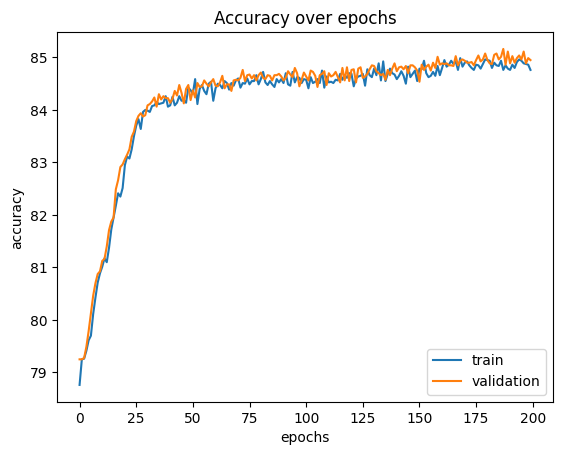

In [24]:
plt.plot(np.array(history.history['accuracy']) *100) # 100%
plt.plot(np.array(history.history['val_accuracy']) *100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()


In [25]:
#model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.8305